In [1]:
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
url0 = "https://www.otodom.pl/pl/oferty/wynajem/mieszkanie/krakow?distanceRadius=0&page="
url1 = "&limit=36&market=ALL&priceMax=10000&locations=%5Bcities_6-38%5D&viewType=listing"
pages = []
for page_number in range(1, 8):
    print(f'Consuming... {page_number}')
    req = urllib.request.Request(f'{url0}{page_number}{url1}', headers={'User-Agent': 'Mozilla/5.0'})
    with urllib.request.urlopen(req) as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        pages.append(processed_page)

print(pages[0].prettify())

Consuming... 1
Consuming... 2
Consuming... 3
Consuming... 4
Consuming... 5
Consuming... 6
Consuming... 7
<!DOCTYPE html>
<html lang="pl">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <link as="font" crossorigin="" href="https://statics.otodom.pl/fp_statics/fonts/OpenSans/Regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://statics.otodom.pl/fp_statics/fonts/OpenSans/SemiBold.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://statics.otodom.pl/fp_statics/fonts/OpenSans/Bold.woff2" rel="preload" type="font/woff2"/>
  <link href="https://statics.otodom.pl" rel="preconnect"/>
  <link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/favicon.svg" rel="icon"/>
  <link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel

In [3]:
full_flat_data = []
for page in pages:
    full_flat_data += page.find_all(class_='css-jxeap9 e1ualqfi0')

print(full_flat_data[1].prettify())

<article class="css-jxeap9 e1ualqfi0">
 <div class="css-gg4vpm e1ualqfi2">
  <h3 class="css-qch36y e1ualqfi3" data-cy="listing-item-title" title="NOWE 2 pok. garderoba balkon os. Wizjonerów">
   NOWE 2 pok. garderoba balkon os. Wizjonerów
  </h3>
 </div>
 <p class="css-14aokuk e1ualqfi4" title="Mieszkanie na wynajem: Kraków, Bronowice">
  Kraków, Bronowice
 </p>
 <div class="eel6co20 css-1ucvgmr ei6hyam0">
  <span class="css-1on0450 ei6hyam2">
   3250 zł/mc
  </span>
  <span class="css-1on0450 ei6hyam2">
   2 pokoje
  </span>
  <span class="css-1on0450 ei6hyam2">
   45 m²
  </span>
  <span class="css-5qfobm ei6hyam4">
   + czynsz: 530 zł/miesiąc
  </span>
 </div>
 <div class="css-1uslxv6 e1ualqfi6">
  <div class="css-70qvj9 enzg89n0">
   <p class="css-1eeelu6 enzg89n3">
    <style data-emotion="css 1k08n8y">
     @media (min-width:991px){.css-1k08n8y{font-size:inherit;}}
    </style>
    <span class="css-1k08n8y enzg89n5">
     Biuro nieruchomości
    </span>
   </p>
  </div>
 </div>
<

In [4]:
flats = []
for flat_data in full_flat_data:
    flat = {
        'name': flat_data.find(class_="css-gg4vpm e1ualqfi2").get_text(),
        'price': float(flat_data.find_all(class_="css-1on0450 ei6hyam2")[0].get_text().split()[0]),
        'rooms': int(flat_data.find_all(class_="css-1on0450 ei6hyam2")[1].get_text().split()[0]),
        'size': float(flat_data.find_all(class_="css-1on0450 ei6hyam2")[2].get_text().split()[0]),
        'location': flat_data.find(class_="css-14aokuk e1ualqfi4").get_text().split()[1].replace(',', '')
    }
    if flat['rooms'] != 0:
        flats.append(flat)
flats

[{'name': 'Kawalerka 30m2 z garażem - ul. Wizjonerów',
  'price': 2000.0,
  'rooms': 1,
  'size': 30.0,
  'location': 'Bronowice'},
 {'name': 'NOWE 2 pok. garderoba balkon os. Wizjonerów',
  'price': 3250.0,
  'rooms': 2,
  'size': 45.0,
  'location': 'Bronowice'},
 {'name': '2-pok. mieszkanie z miejscem postojowym w cenie !!',
  'price': 2500.0,
  'rooms': 2,
  'size': 44.0,
  'location': 'Bronowice'},
 {'name': 'Prądnik Czerwony | Meiera | 2 pok. | Eng | Ru',
  'price': 2700.0,
  'rooms': 2,
  'size': 51.0,
  'location': 'Prądnik'},
 {'name': 'Przestronne mieszkanie z DUŻYM BALKONEM',
  'price': 3300.0,
  'rooms': 3,
  'size': 63.0,
  'location': 'Podgórze'},
 {'name': 'Nowe mieszkanie Ozon | Нова квартира 75m2',
  'price': 3799.0,
  'rooms': 3,
  'size': 75.0,
  'location': 'małopolskie'},
 {'name': 'REZERWACJA: Piękne, nowe, trzypokojowe, z dużą łaz',
  'price': 2350.0,
  'rooms': 3,
  'size': 35.0,
  'location': 'Podgórze'},
 {'name': 'Nowe Mieszkanie-Apartament Rękawka, Podgórze,

In [5]:
df = pd.DataFrame.from_dict(flats)
df.head()

,name,price,rooms,size,location
0,Kawalerka 30m2 z garażem - ul. Wizjonerów,2000.0,1,30.0,Bronowice
1,NOWE 2 pok. garderoba balkon os. Wizjonerów,3250.0,2,45.0,Bronowice
2,2-pok. mieszkanie z miejscem postojowym w ceni...,2500.0,2,44.0,Bronowice
3,Prądnik Czerwony | Meiera | 2 pok. | Eng | Ru,2700.0,2,51.0,Prądnik
4,Przestronne mieszkanie z DUŻYM BALKONEM,3300.0,3,63.0,Podgórze


array([[<Axes: title={'center': 'price'}>]], dtype=object)

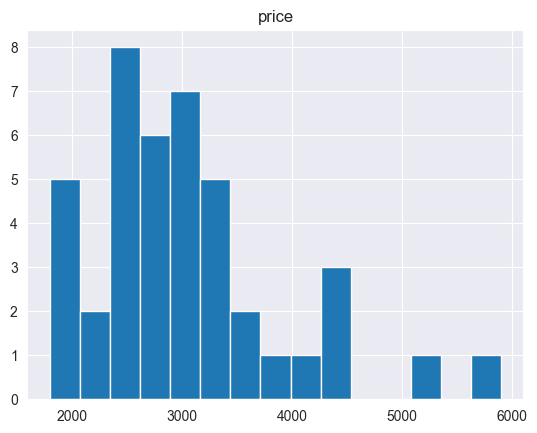

In [6]:
df.hist(column='price', bins=15)

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

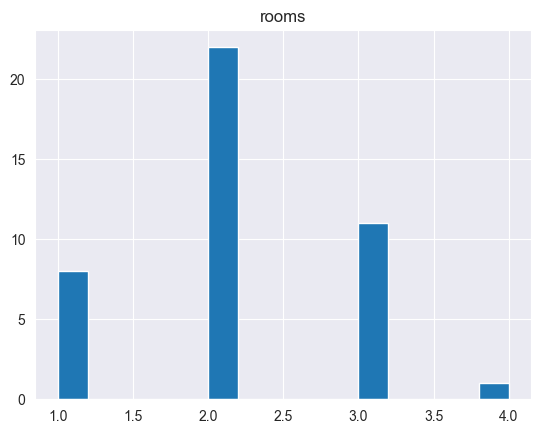

In [7]:
df.hist(column='rooms', bins=15)

<Axes: xlabel='rooms', ylabel='price'>

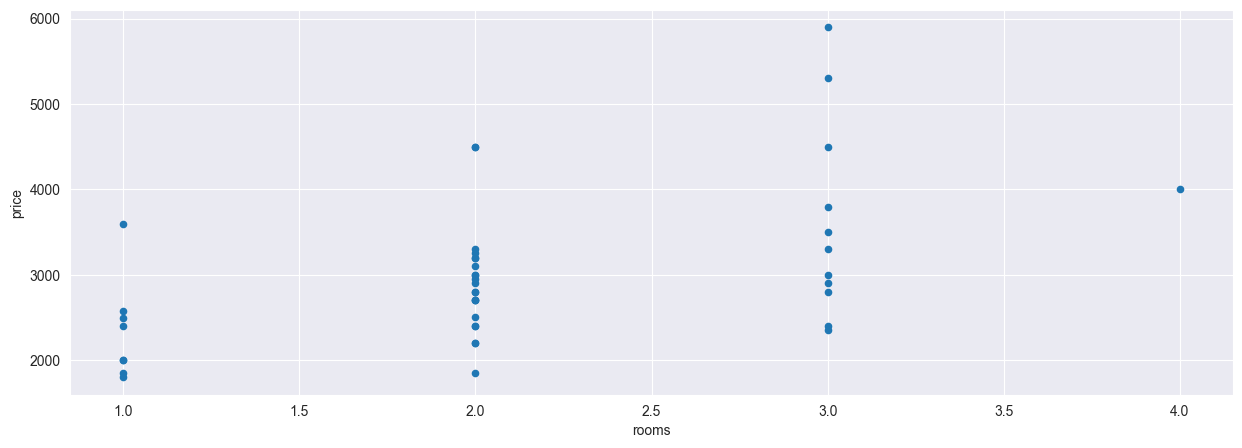

In [8]:
df.plot.scatter(x='rooms', y='price', figsize=(15, 5))

In [9]:
df.rooms.value_counts()

rooms
2    22
3    11
1     8
4     1
Name: count, dtype: int64

<Axes: xlabel='rooms'>

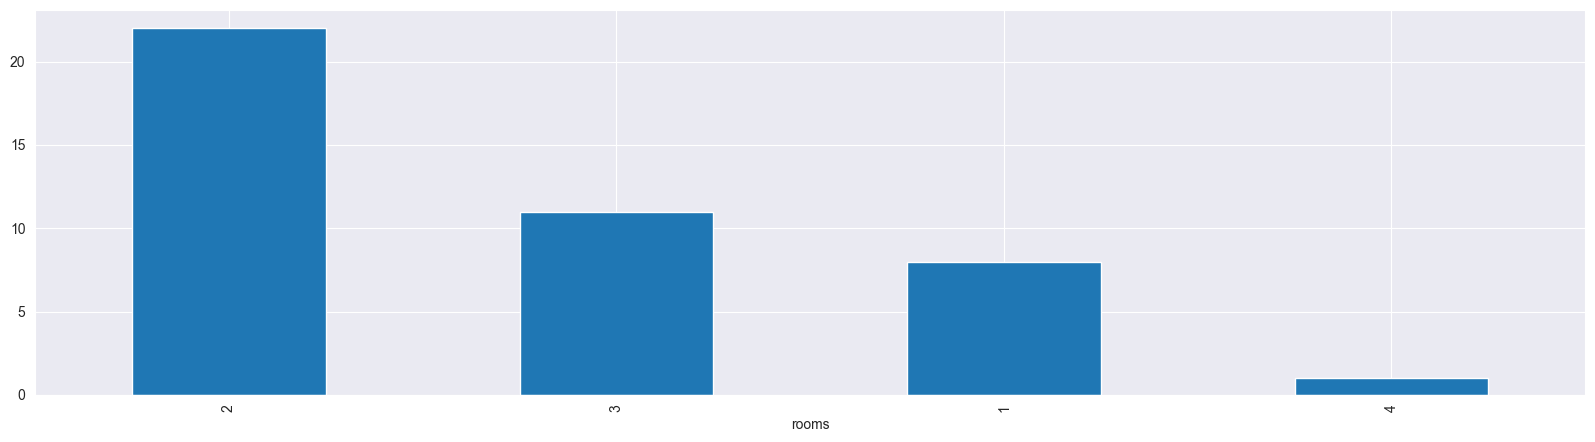

In [10]:
df.rooms.value_counts().plot(kind='bar', figsize=(20, 5))

In [11]:
df.location.value_counts().to_frame()

,count
location,
Podgórze,12
Dębniki,6
Bronowice,5
Krowodrza,5
Prądnik,4
małopolskie,2
Stare,2
Nowa,2
Grzegórzki,1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

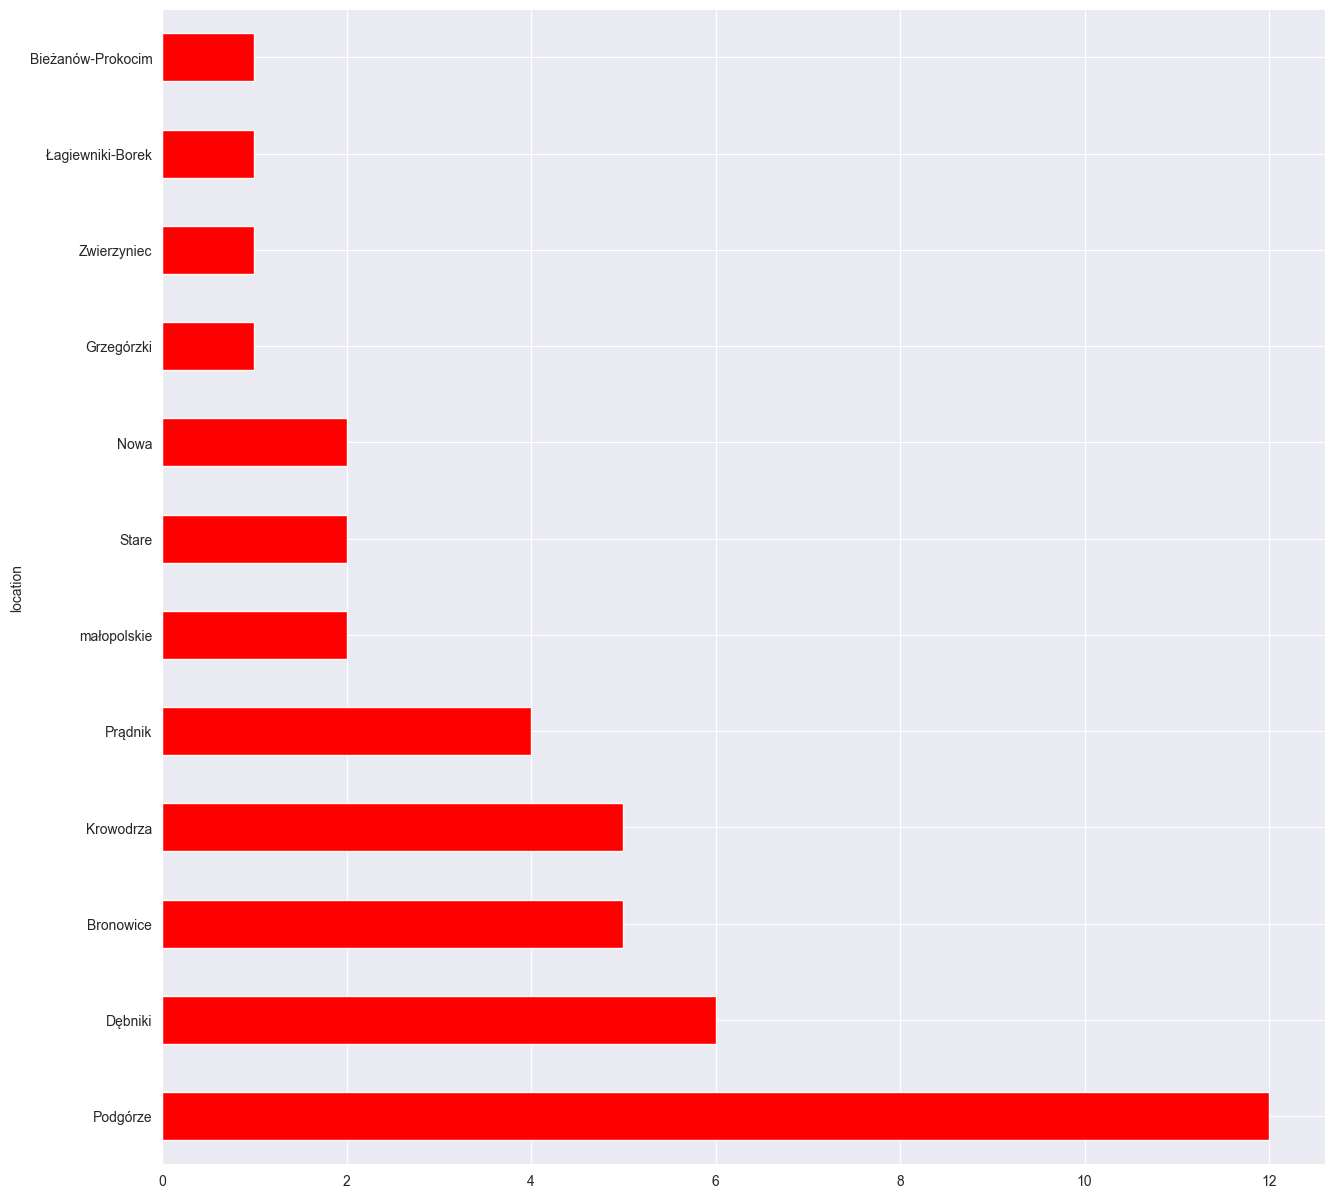

In [13]:
df["location"].value_counts().sort_values(ascending=False).plot(kind='barh', figsize=(15, 15), color='red', grid=True)
plt.show()

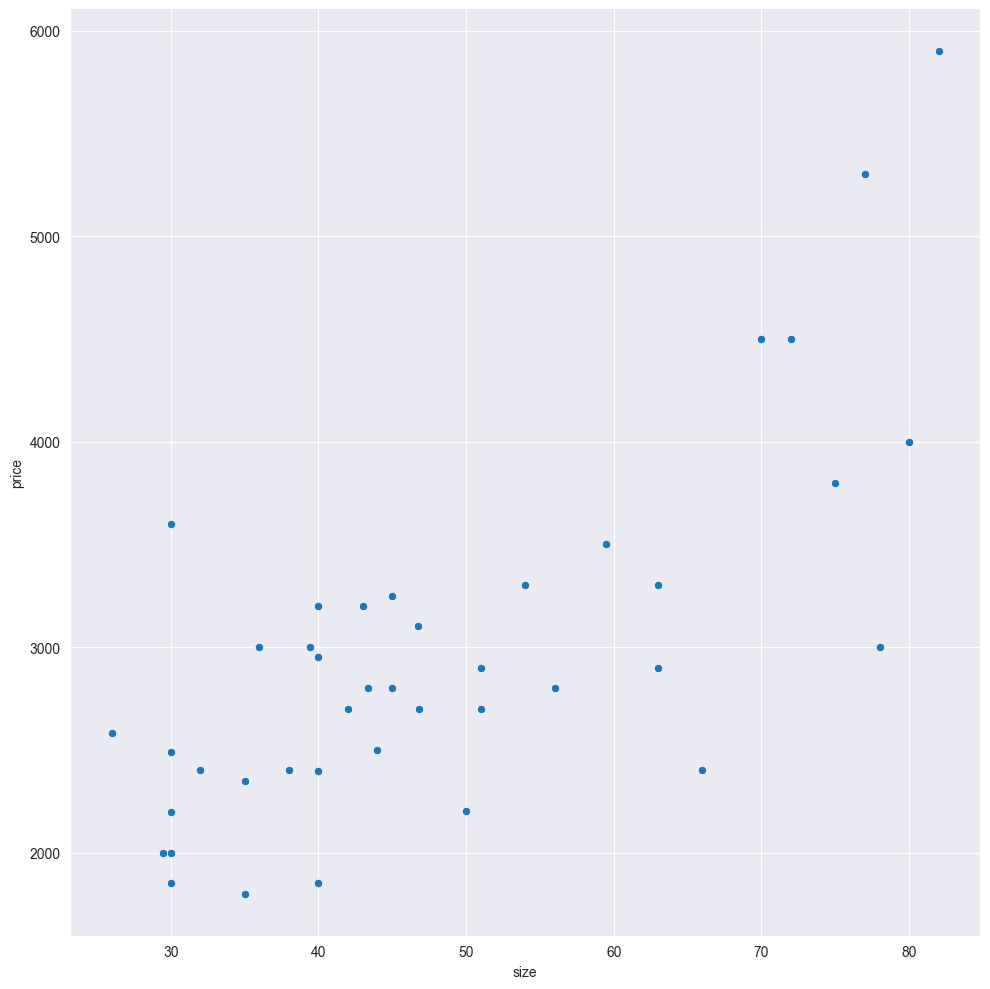

In [14]:
sns.relplot(x=df["size"], y=df["price"], kind="scatter", height=10)